In [ ]:
import json
import pandas as pd
import numpy as np

#df = pd.read_csv("titanic.csv")
df = pd.read_csv("train.csv")
null_values = df.isnull().sum()
df = df[df['Age'] < 70]
# Print the columns with null values and their counts
print("Columns with null values:")
print(null_values[null_values > 0])
#data.head()

Columns with null values:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:
# 3. Check data types
print(df.dtypes)

# 4. Summary statistics
print(df.describe())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
       PassengerId    Survived      Pclass         Age       SibSp  \
count   707.000000  707.000000  707.000000  707.000000  707.000000   
mean    447.917963    0.408769    2.241867   29.276761    0.516266   
std     258.843947    0.491955    0.836186   13.956286    0.932998   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.500000    0.000000    1.000000   20.000000    0.000000   
50%     443.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   66.000000    5.000000   

            Parch        Fare  
count  707.000000  707.000000  
mean     0.4342

In [ ]:
# Identify missing values
print(df.isnull().sum())
# Handle missing values (e.g., impute or remove)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          525
Embarked         2
dtype: int64


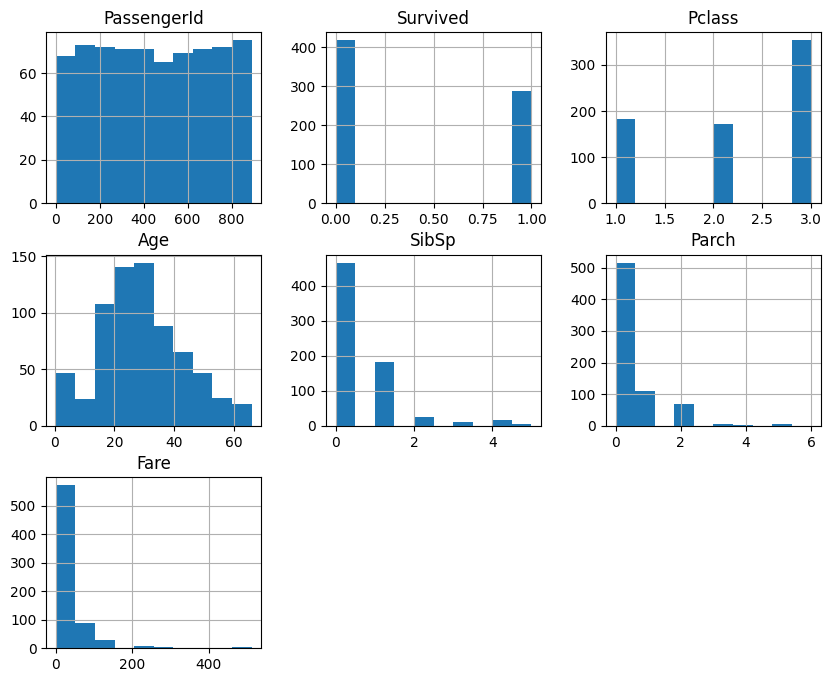

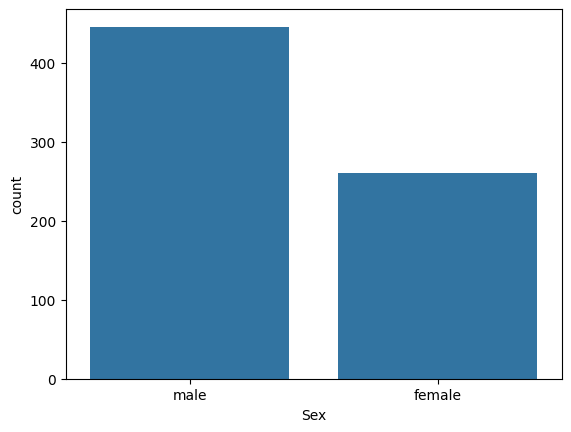

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 6. Distribution of variables
# Numeric variables
df.hist(figsize=(10, 8))
plt.show()
# Categorical variables
sns.countplot(x='Sex', data=df)
plt.show()

In [ ]:
# 8. Pairwise scatter plots
#sns.pairplot(df)
#plt.show()

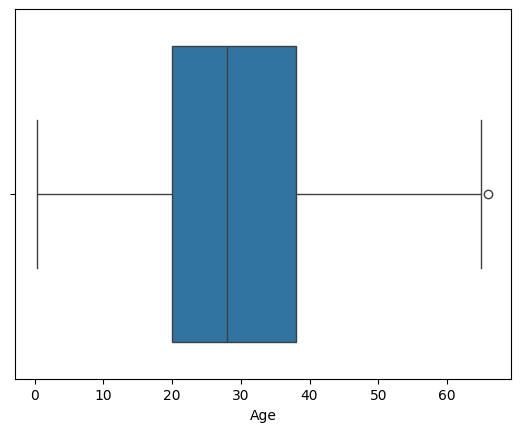

In [ ]:
# 11. Outlier detection
sns.boxplot(x='Age', data=df)
plt.show()

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [ ]:
# Convert 'Sex' and 'Embarked' columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# If 'Name' contains titles that need to be extracted, handle it accordingly
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].replace(['Mme', 'Mlle', 'Lady', 'Sir', 'Ms', 'Countess', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don'], 'Officer')
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# Drop columns that won't be used for modeling
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Fare'] = scaler.fit_transform(df[['Fare']])
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} accuracy: {model.score(X_val, y_val)}')

RandomForest accuracy: 0.795774647887324
LogisticRegression accuracy: 0.7464788732394366
SVC accuracy: 0.6338028169014085


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

best_model = models['RandomForest']
y_pred = best_model.predict(X_val)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[73 17]
 [12 40]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        90
           1       0.70      0.77      0.73        52

    accuracy                           0.80       142
   macro avg       0.78      0.79      0.78       142
weighted avg       0.80      0.80      0.80       142



In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train, y_train)

#print(grid_search.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train, y_train)

#print("Best parameters found: ", grid_search.best_params_)
#print("Best cross-validation accuracy: ", grid_search.best_score_)

In [ ]:
import joblib


# Save RL_Model to file in the current working directory

joblib_file = "joblib_Model.pkl"
joblib.dump(best_model, joblib_file)



['joblib_Model.pkl']

In [ ]:
import pandas as pd

# Load the test data
test_df = pd.read_csv('test(1).csv')
# Handle missing values
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Cabin'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numeric
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Extract and encode titles from 'Name'
test_df['Title'] = test_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Title'].replace(['Mme', 'Mlle', 'Lady', 'Sir', 'Ms', 'Countess', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don'], 'Officer')
test_df = pd.get_dummies(test_df, columns=['Title'], drop_first=True)

# Drop columns not needed for modeling
test_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Ensure the test data has the same features as the training data
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_df['Age'] = scaler.fit_transform(test_df[['Age']])
test_df['Fare'] = scaler.fit_transform(test_df[['Fare']])
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)


# Reorder the columns to match the training data
test_df = test_df[X_train.columns]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_df['Age'] = scaler.fit_transform(test_df[['Age']])
test_df['Fare'] = scaler.fit_transform(test_df[['Fare']])

In [ ]:
rf_model = joblib.load('joblib_Model.pkl')

# If you haven't saved it, make sure to train the model as done previously
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_model.fit(test_df, y_train)

In [ ]:
predictions = rf_model.predict(test_df)

In [ ]:
# Create a DataFrame with the predictions
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)